In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score ,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv('flight_delay.csv')

In [59]:
df.head()

,flight_id,year,month,day_of_week,airline,origin_airport,destination_airport,scheduled_departure_hour,flight_distance_km,aircraft_turnaround_delay_min,weather_condition,wind_speed_kmh,airport_congestion_index,arrival_delay_minutes,delay_risk_class
0,FL100000,2023,7,4,B6,JFK,DEN,2,2393,9.8,Storm,46,87,117,High_Risk
1,FL100001,2022,8,3,UA,ATL,SEA,11,1447,7.0,Rain,59,99,33,Moderate_Risk
2,FL100002,2023,8,3,B6,ORD,DEN,4,1900,9.5,Storm,43,93,54,High_Risk
3,FL100003,2022,2,4,DL,JFK,DFW,5,4159,0.5,Storm,42,61,51,High_Risk
4,FL100004,2023,5,5,DL,ATL,SFO,8,2485,17.4,Rain,51,27,4,Low_Risk


In [60]:
df.columns

Index(['flight_id', 'year', 'month', 'day_of_week', 'airline',
       'origin_airport', 'destination_airport', 'scheduled_departure_hour',
       'flight_distance_km', 'aircraft_turnaround_delay_min',
       'weather_condition', 'wind_speed_kmh', 'airport_congestion_index',
       'arrival_delay_minutes', 'delay_risk_class'],
      dtype='object')

In [61]:
df.shape

(3000, 15)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   flight_id                      3000 non-null   object 
 1   year                           3000 non-null   int64  
 2   month                          3000 non-null   int64  
 3   day_of_week                    3000 non-null   int64  
 4   airline                        3000 non-null   object 
 5   origin_airport                 3000 non-null   object 
 6   destination_airport            3000 non-null   object 
 7   scheduled_departure_hour       3000 non-null   int64  
 8   flight_distance_km             3000 non-null   int64  
 9   aircraft_turnaround_delay_min  3000 non-null   float64
 10  weather_condition              3000 non-null   object 
 11  wind_speed_kmh                 3000 non-null   int64  
 12  airport_congestion_index       3000 non-null   i

In [63]:
df.describe()

,year,month,day_of_week,scheduled_departure_hour,flight_distance_km,aircraft_turnaround_delay_min,wind_speed_kmh,airport_congestion_index,arrival_delay_minutes
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,2022.495000,6.485000,3.959000,11.547333,2411.793667,9.926300,29.622000,58.98900,22.917667
std,0.500058,3.433323,2.012627,6.925153,1199.844190,9.608115,17.303282,23.23281,25.949387
min,2022.000000,1.000000,1.000000,0.000000,301.000000,0.000000,0.000000,20.00000,-5.000000
25%,2022.000000,4.000000,2.000000,6.000000,1381.750000,2.900000,15.000000,39.00000,3.000000
50%,2022.000000,6.000000,4.000000,11.000000,2421.000000,7.000000,30.000000,59.00000,15.000000
75%,2023.000000,9.000000,6.000000,18.000000,3421.250000,14.100000,45.000000,79.00000,36.000000
max,2023.000000,12.000000,7.000000,23.000000,4497.000000,72.500000,59.000000,99.00000,125.000000


In [64]:
df['delay_risk_class'].value_counts()

delay_risk_class
Low_Risk         1526
Moderate_Risk     944
High_Risk         530
Name: count, dtype: int64

Removing the Features which is not required

In [65]:
df.drop(['flight_id','year','aircraft_turnaround_delay_min','arrival_delay_minutes'],axis=1,inplace = True)

In [66]:
df.head()

,month,day_of_week,airline,origin_airport,destination_airport,scheduled_departure_hour,flight_distance_km,weather_condition,wind_speed_kmh,airport_congestion_index,delay_risk_class
0,7,4,B6,JFK,DEN,2,2393,Storm,46,87,High_Risk
1,8,3,UA,ATL,SEA,11,1447,Rain,59,99,Moderate_Risk
2,8,3,B6,ORD,DEN,4,1900,Storm,43,93,High_Risk
3,2,4,DL,JFK,DFW,5,4159,Storm,42,61,High_Risk
4,5,5,DL,ATL,SFO,8,2485,Rain,51,27,Low_Risk


In [67]:
df['origin_airport'].value_counts()

origin_airport
SFO    419
ATL    394
JFK    378
LAX    370
ORD    368
DFW    364
DEN    355
SEA    352
Name: count, dtype: int64

In [68]:
df['destination_airport'].value_counts()

destination_airport
DEN    401
JFK    400
LAX    394
ATL    370
ORD    367
SFO    366
SEA    361
DFW    341
Name: count, dtype: int64

In [69]:
df['airline'].value_counts()

airline
UA    616
WN    611
DL    604
AA    594
B6    575
Name: count, dtype: int64

In [70]:
df['weather_condition'].value_counts()

weather_condition
Clear    1642
Rain      752
Storm     472
Snow      134
Name: count, dtype: int64

In [71]:
pd.crosstab(df['airline'], df['delay_risk_class'])

delay_risk_class,High_Risk,Low_Risk,Moderate_Risk
airline,,,
AA,118,296,180
B6,103,303,169
DL,110,295,199
UA,107,317,192
WN,92,315,204


Air line wise Percentage distribution

In [72]:
pd.crosstab(df['airline'], df['delay_risk_class'],normalize ='index') * 100

delay_risk_class,High_Risk,Low_Risk,Moderate_Risk
airline,,,
AA,19.865320,49.831650,30.303030
B6,17.913043,52.695652,29.391304
DL,18.211921,48.841060,32.947020
UA,17.370130,51.461039,31.168831
WN,15.057283,51.554828,33.387889


In [73]:
delay_risk_mapping = {"Low_Risk": 0,"Moderate_Risk": 1,"High_Risk": 2}
df["delay_risk_class"] = df["delay_risk_class"].map(delay_risk_mapping)

In [74]:
df

,month,day_of_week,airline,origin_airport,destination_airport,scheduled_departure_hour,flight_distance_km,weather_condition,wind_speed_kmh,airport_congestion_index,delay_risk_class
0,7,4,B6,JFK,DEN,2,2393,Storm,46,87,2
1,8,3,UA,ATL,SEA,11,1447,Rain,59,99,1
2,8,3,B6,ORD,DEN,4,1900,Storm,43,93,2
3,2,4,DL,JFK,DFW,5,4159,Storm,42,61,2
4,5,5,DL,ATL,SFO,8,2485,Rain,51,27,0
...,...,...,...,...,...,...,...,...,...,...,...
2995,7,5,UA,DEN,SEA,13,1232,Clear,25,58,0
2996,4,6,AA,JFK,ORD,14,2070,Clear,30,98,1
2997,7,3,B6,DEN,DEN,12,614,Snow,21,22,2
2998,3,3,UA,ORD,SEA,12,1305,Clear,34,80,0


In [75]:
df = pd.get_dummies(df,drop_first = True)

In [76]:
df = df.astype(int)

In [77]:
df

,month,day_of_week,scheduled_departure_hour,flight_distance_km,wind_speed_kmh,airport_congestion_index,delay_risk_class,airline_B6,airline_DL,airline_UA,...,destination_airport_DEN,destination_airport_DFW,destination_airport_JFK,destination_airport_LAX,destination_airport_ORD,destination_airport_SEA,destination_airport_SFO,weather_condition_Rain,weather_condition_Snow,weather_condition_Storm
0,7,4,2,2393,46,87,2,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,8,3,11,1447,59,99,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,8,3,4,1900,43,93,2,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,2,4,5,4159,42,61,2,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,5,5,8,2485,51,27,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,7,5,13,1232,25,58,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2996,4,6,14,2070,30,98,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2997,7,3,12,614,21,22,2,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2998,3,3,12,1305,34,80,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [78]:
X = df.drop('delay_risk_class',axis = 1)
y = df['delay_risk_class']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

# Logistics Regression

In [81]:
model = LogisticRegression(multi_class="multinomial",solver="lbfgs",max_iter=1000,class_weight="balanced")

In [82]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [83]:
y_pred = model.predict(X_test)

In [84]:
print(confusion_matrix(y_test,y_pred))

[[379 136   5]
 [ 37 220  41]
 [  8  35 129]]


In [85]:
lr_scores = cross_val_score(model,X,y,cv=cv,scoring="f1_macro")

In [86]:
print(lr_scores)
print(round(lr_scores.mean(),2))

[0.72089105 0.71622678 0.72496065 0.75113257 0.74195935]
0.73


In [87]:
print(classification_report(y_test,y_pred,target_names=["Low_Risk", "Moderate_Risk", "High_Risk"]))

               precision    recall  f1-score   support

     Low_Risk       0.89      0.73      0.80       520
Moderate_Risk       0.56      0.74      0.64       298
    High_Risk       0.74      0.75      0.74       172

     accuracy                           0.74       990
    macro avg       0.73      0.74      0.73       990
 weighted avg       0.77      0.74      0.74       990



# Decision Tree Classifier

In [88]:
dt = DecisionTreeClassifier(criterion="gini",max_depth=10, random_state=42)

In [89]:
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [90]:
y_pred_dt = dt.predict(X_test)

In [91]:
print("Decision Tree Recall score :", recall_score(y_test, y_pred_dt,average="macro"))

Decision Tree Recall score : 0.7579032148331352


In [92]:
print(confusion_matrix(y_test, y_pred_dt))

[[466  54   0]
 [ 46 213  39]
 [  1  57 114]]


In [93]:
dt_scores = cross_val_score(dt,X,y,cv=cv, scoring="f1_macro")

In [94]:
print("CV scores:", dt_scores)

CV scores: [0.78423966 0.76883979 0.7618046  0.7412733  0.79374307]


In [95]:
print(" Mean CV score:", dt_scores.mean())

 Mean CV score: 0.7699800853379548


# Random Forest Classifier

In [96]:
rf = RandomForestClassifier(n_estimators=300,min_samples_split=5,min_samples_leaf=2,class_weight="balanced",random_state=42,n_jobs=-1)

In [97]:
rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [98]:
y_pred_rf = rf.predict(X_test)

In [99]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8494949494949495


Type II error is more dangerous than Type I error

In [100]:
print("Random Forest Recall :", recall_score(y_test, y_pred_rf,average="macro"))

Random Forest Recall : 0.8303107978853258


In [101]:
print("Random Forest F1 score: ",f1_score(y_test, y_pred_rf,average="macro"))

Random Forest F1 score:  0.8230282030939206


In [102]:
print(confusion_matrix(y_test,y_pred_rf))

[[480  40   0]
 [ 36 216  46]
 [  0  27 145]]


In [103]:
feature_importance = pd.DataFrame({"feature": X_train.columns, "importance": rf.feature_importances_})

In [104]:
feature_importance = feature_importance.sort_values(by="importance",ascending=False)

In [105]:
feature_importance.head()

,feature,importance
26,weather_condition_Storm,0.288218
5,airport_congestion_index,0.269933
25,weather_condition_Snow,0.084751
3,flight_distance_km,0.057830
4,wind_speed_kmh,0.052074


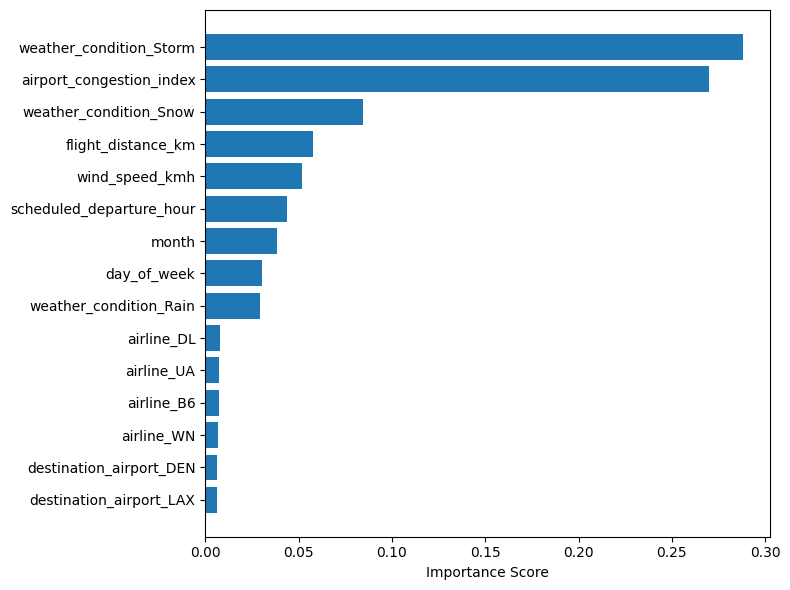

In [106]:
plt.figure(figsize=(8,6))
plt.barh(feature_importance["feature"][:15][::-1],feature_importance["importance"][:15][::-1])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()